In [1]:
library(data.table)
library(ggplot2)
library(matrixStats)
library(ggsci)
library(magrittr) 
library(ggrepel)
library(dplyr)
library(ComplexHeatmap)
library(ggpubr)
library(circlize)
library(hrbrthemes)

confidence_interval_upper <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean + error
  return(result)
}
confidence_interval_lower <- function(vector, interval=0.95) {
  # Standard deviation of sample
  vec_sd <- sd(vector, na.rm = TRUE)
  # Sample size
  n <- length(vector)
  # Median of sample
  vec_mean <- mean(vector, na.rm = TRUE)
  # Error according to t distribution
  error <- qt((interval + 1)/2, df = n - 1) * vec_sd / sqrt(n)
  # Confidence interval as a vector
  result <- vec_mean - error
  return(result)
}
createEmptyDf = function( nrow, ncol, colnames = c() ){
  if( missing( ncol ) && length( colnames ) > 0 ){
    ncol = length( colnames )
  }
  data.frame( matrix( vector(), nrow, ncol, dimnames = list( c(), colnames ) ) )
}


 次のパッケージを付け加えます: ‘dplyr’ 


 以下のオブジェクトは ‘package:matrixStats’ からマスクされています: 

     count 


 以下のオブジェクトは ‘package:data.table’ からマスクされています: 

     between, first, last 


 以下のオブジェクトは ‘package:stats’ からマスクされています: 

     filter, lag 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     intersect, setdiff, setequal, union 


 要求されたパッケージ grid をロード中です 

ComplexHeatmap version 2.10.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.15
C

In [2]:
setwd("/Users/inamojun/TMDU-LR_isoform_atlas/R")

In [3]:
#load data
load("../data/data_Fig02.RData")

In [4]:
head(out)

,isoform,specificity_LR,specific_cell_LR,five_utr_length,CDS_length,three_utr_length
,<chr>,<lgl>,<chr>,<int>,<int>,<int>
1,000004f8-97dc-497b-a4aa-1022a682d3af,FALSE,NA,NA,NA,NA
2,0002076b-091b-42ce-b6de-0d74a404ea36,FALSE,NA,192,1191,305
3,0002b464-6fb4-4e4c-aba7-e27c7c7782a7,FALSE,NA,272,954,250
4,0002c8a5-bf73-48a8-9ba9-fd8bc360872e-1,FALSE,NA,94,648,450
5,000311e5-7b24-4a2d-b270-23ddd9f935df,FALSE,NA,706,1191,261
6,0003173a-a200-4d9f-80ad-651d95f7be6e,FALSE,NA,149,633,196


In [5]:
head(mat_var) # top 5000 high variable isoforms among cell types after normalizing by Read Per Million
dim(mat_var)

,NaiveCD4,Th1,Th2,Th17,Tfh,Fr.I nTreg,Fr.II aTreg,Fr.III non-Treg,LAG3 Treg,Memory CD4,⋯,plasmablast,pDC,mDC,NK,CL Mono,NC Mono,Int Mono,CD16p Mono,PBMC,Neu
82492804-ec50-4d1c-b8ad-727c6c045caf,1.1403880,-0.5217533,-0.4362609,-1.0896180,0.35755318,-0.5006489,-0.7981197,-0.8351297,-0.5392713,-0.4926312,⋯,-0.1246548,-0.7517470,-1.089618,-1.0896180,-0.6924110,-0.4971035,-0.32665054,-1.0734661,-0.6670887,1.878419
4b21f3b2-966c-4b0b-9f74-dc9ff43ea2e6,-0.6590589,-0.8713235,-0.8094395,-1.0608550,-0.07075027,-0.9015104,-1.0608550,-1.0577298,-0.8746379,0.3292802,⋯,1.4228029,-1.0513917,-1.060855,-0.7540219,0.2504218,-0.7366248,0.03671931,-0.8498076,-0.0929512,1.749148
c5ccc58a-c7ef-45a4-8f38-69187aacf61d,0.1774822,-0.5413200,-0.7878381,-1.2747582,1.01577878,-0.9397079,-1.2747582,-0.7854547,-1.0470625,1.4235934,⋯,0.7759159,-0.8682172,-1.274758,-1.2602116,0.4745735,-0.9864618,0.42364064,-1.0694394,0.7149930,1.490335
27bae2bb-7648-4108-9d01-e229146c6c0f,-0.2680495,1.1107793,1.2855988,0.6528391,0.83454080,-0.1362269,0.7550490,0.4399229,-0.3767635,-0.5296853,⋯,-1.4792055,-1.0354469,1.369326,0.5832063,0.6409314,1.3693261,1.02620832,1.3693261,0.6082817,-1.479205
1a00b3b9-2fda-4fd3-b93a-224a02c33126,1.6661882,0.3414464,0.3458071,-1.2685547,0.47973517,-0.6955762,-1.0458096,-0.7492228,-0.5491368,-0.4298753,⋯,0.3189305,-0.4364075,-1.268555,-1.2685547,-0.6134872,-1.2612056,0.18127410,-1.2430138,-0.5610499,1.706414
19d3175d-ea5f-4099-8b1a-113536ef83f3,0.7051982,0.2614280,0.3990897,-1.2631147,1.42291427,-1.0519687,-1.1663045,-1.2631147,-1.2382282,0.3168793,⋯,0.1623018,-0.9543306,-1.263115,-1.1166078,-0.5119860,-0.9559848,0.68730379,-1.1230600,-0.8583035,1.456724


[1] 5000   29

In [6]:
head(mat) # specific isoforms after normalizing by Read Per Million
dim(mat)

,NaiveCD4,Th1,Th2,Th17,Tfh,Fra1,Fra2.aTreg,Fra3,LAG3Treg,MemoryCD4,⋯,plasmablast,plasmacytoidDC,myeloidDC,NK,monocyteCD16,monocyteCD16minus,nonclassicalMonocyte,intermediateMonocyte,PBMC,Neutrophil
6eb1ae6a-b0d9-46c7-a6c7-fb63b4535884,55.89366,18.514498,13.550922,23.16487,27.007830,26.735522,18.7686660,22.670134,36.4852455,25.797285,⋯,38.507860,11.719169,9.853479,17.5204683,4.743034,10.811816,6.975972,11.825891,16.986048,42.78716
5049649c-cb50-4d59-a206-e116df4e8d2d,32.60464,6.732545,7.743384,0.00000,10.803132,1.782368,0.7820278,3.400520,10.3260129,11.906439,⋯,7.967144,0.000000,3.284493,0.8760234,7.114551,4.324726,2.790389,6.569940,3.919857,0.00000
ENST00000483764.5,25.15215,5.049408,19.358461,14.02084,16.204698,7.129472,13.2944718,5.667533,6.8840086,21.828472,⋯,3.983572,4.687667,8.211232,6.1321639,14.229103,2.162363,4.883180,2.627976,6.533095,0.00000
f02ab870-b4c0-49a2-8b1e-4ec8e680752d,27.94683,5.049408,13.550920,12.19204,10.803130,7.129472,8.6023050,2.267013,17.2100200,19.844070,⋯,2.655715,8.705668,6.568986,7.0081870,2.371517,8.649453,9.068764,7.883928,7.839714,0.00000
3aa81c7a-5700-4bf1-a456-c160f558cdb1,24.22059,5.049408,9.679230,6.70562,5.401566,5.941227,6.2562220,4.534027,13.0796163,3.968813,⋯,2.655715,7.366335,3.284493,6.1321639,2.371517,8.649453,7.673569,6.569940,13.066191,0.00000
74c0d9bb-87b0-44f8-9fc1-21997987337b,23.28903,10.098817,0.000000,12.80164,0.000000,13.070699,4.6921665,10.201560,0.6884009,1.984407,⋯,0.000000,3.683167,4.926739,7.8842107,7.114551,3.243545,3.487986,3.941964,2.613238,0.00000


[1] 2575   29

In [7]:
head(col_lab) # with label
dim(col_lab)

,NaiveCD4,Th1,Th2,Th17,Tfh,Fra1,Fra2.aTreg,Fra3,LAG3Treg,MemoryCD4,⋯,specific_cell_LR,specific_cell_LRgroup,specific_cell_SR,id,immunexut_specific,group,iso_vars,var_rank_all,immune_or_TF,var_rank
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<lgl>,<int>
6eb1ae6a-b0d9-46c7-a6c7-fb63b4535884,55.89366,18.514498,13.550922,23.16487,27.007830,26.735522,18.7686660,22.670134,36.4852455,25.797285,⋯,NaiveCD4,NA,NA,SMBD1P_SDHAP2-isoform [NaiveCD4],NA,NA,163.66019,1,FALSE,1
5049649c-cb50-4d59-a206-e116df4e8d2d,32.60464,6.732545,7.743384,0.00000,10.803132,1.782368,0.7820278,3.400520,10.3260129,11.906439,⋯,NaiveCD4,NA,NA,ANKHD1-isoform [NaiveCD4],NA,NA,42.60982,2,FALSE,2
ENST00000483764.5,25.15215,5.049408,19.358461,14.02084,16.204698,7.129472,13.2944718,5.667533,6.8840086,21.828472,⋯,NaiveCD4,NA,NA,MRPL28-isoform [NaiveCD4],Fr._II_eTreg,Fra2.aTreg,41.65742,3,FALSE,3
f02ab870-b4c0-49a2-8b1e-4ec8e680752d,27.94683,5.049408,13.550920,12.19204,10.803130,7.129472,8.6023050,2.267013,17.2100200,19.844070,⋯,NaiveCD4,NA,NA,CHMP1A-isoform [NaiveCD4],NA,NA,37.52324,4,FALSE,4
3aa81c7a-5700-4bf1-a456-c160f558cdb1,24.22059,5.049408,9.679230,6.70562,5.401566,5.941227,6.2562220,4.534027,13.0796163,3.968813,⋯,NaiveCD4,NA,NA,WDR70-isoform [NaiveCD4],NA,NA,33.44677,5,FALSE,5
74c0d9bb-87b0-44f8-9fc1-21997987337b,23.28903,10.098817,0.000000,12.80164,0.000000,13.070699,4.6921665,10.201560,0.6884009,1.984407,⋯,NaiveCD4,NA,NA,BRAP-isoform [NaiveCD4],NA,NA,30.23784,6,FALSE,6


[1] 2575   42

In [8]:
head(elavl) # ELAVL1 RIP-seq peaks and their region, isoform expression of RNA-seq derived from relevant cells (LCL, GEUVADIS)
dim(elavl)

,isoform,chrom,start,end,score,peak_width,abs_summit,pileup,associated_gene_isoform,isoform_info,⋯,five_utr_length,three_utr_length,intron_length,log_tpm_max,log_tpm_med,peak_id,isoform_count_per_peak,peak_count_per_isoform,peak_count_per_gene,log_tpm_med_sum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1,39c5e45e-c360-44ac-9a0e-5ed5735a5943,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"39c5e45e-c360-44ac-9a0e-5ed5735a5943[ATAD3B],chr1:1477350-1477750,+,Intron",⋯,1670,451,8784,1.1412427,0.15598106,chr1:1477451-1477798,8,1,1,5.558943
2,39c5e45e-c360-44ac-9a0e-5ed5735a5943,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"39c5e45e-c360-44ac-9a0e-5ed5735a5943[ATAD3B],chr1:1477750-1479019,+,5UTR",⋯,1670,451,8784,1.1412427,0.15598106,chr1:1477451-1477798,8,1,1,5.558943
3,4a88c7c1-03a4-477d-9e01-67faed611f8a,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"4a88c7c1-03a4-477d-9e01-67faed611f8a[ATAD3B],chr1:1477273-1479019,+,5UTR",⋯,2070,451,8384,0.7462320,0.02705738,chr1:1477451-1477798,8,1,1,5.558943
4,61c8f5a3-7017-4ee5-b585-cef3d1b63058,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"61c8f5a3-7017-4ee5-b585-cef3d1b63058[ATAD3B],chr1:1477273-1478500,+,5UTR",⋯,1532,1697,7486,0.5322716,0.02387896,chr1:1477451-1477798,8,1,1,5.558943
5,6accf0b8-245b-4096-bdc0-d1c198769c7c,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"6accf0b8-245b-4096-bdc0-d1c198769c7c[ATAD3B],chr1:1477273-1478500,+,5UTR",⋯,1551,451,8687,1.1080578,0.15288403,chr1:1477451-1477798,8,1,1,5.558943
6,7e65a0a2-0c00-41e3-a7b6-0eb789027f98,chr1,1477451,1477798,1313,347,1477624,124,ATAD3B,"7e65a0a2-0c00-41e3-a7b6-0eb789027f98[ATAD3B],chr1:1477350-1478643,+,Intron",⋯,101,2219,8476,0.3722511,0.00000000,chr1:1477451-1477798,8,1,1,5.558943


[1] 445172     29

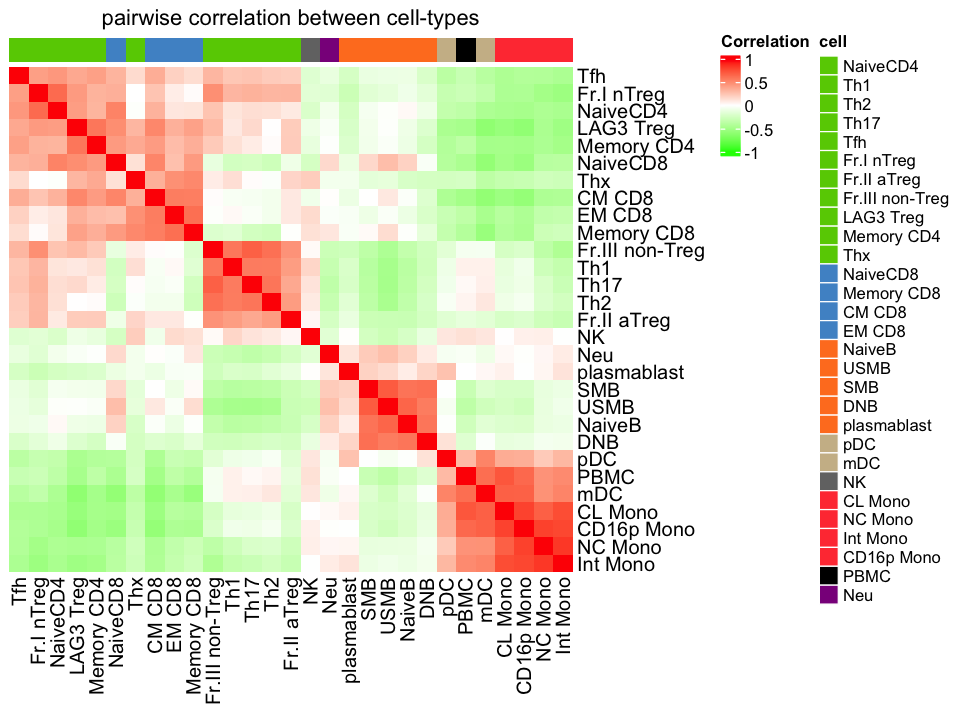

In [9]:
# hirarchial clustering by expression correlation among cell types using the top 5000 variable isoforms
ha = HeatmapAnnotation(cell = factor(colnames(mat_var), levels = colnames(mat_var)),
                       col = list(cell = c("NaiveCD4" = "chartreuse3","Th1" = "chartreuse3","Th2" = "chartreuse3","Th17" = "chartreuse3","Tfh" = "chartreuse3","Fr.I nTreg" = "chartreuse3","Fr.II aTreg" = "chartreuse3","Fr.III non-Treg" = "chartreuse3","LAG3 Treg" = "chartreuse3","Memory CD4" = "chartreuse3","Thx" = "chartreuse3",
                                           "NaiveCD8" = "steelblue3","Memory CD8" = "steelblue3","CM CD8" = "steelblue3","EM CD8" = "steelblue3",
                                           "NaiveB" = "chocolate1","USMB" = "chocolate1","SMB" = "chocolate1","DNB" = "chocolate1","plasmablast" = "chocolate1",
                                           "pDC" = "wheat3","mDC" = "wheat3",
                                           "NK" = "grey45",
                                           "CL Mono" = "brown1","NC Mono" = "brown1","Int Mono" = "brown1","CD16p Mono" = "brown1",
                                           "PBMC" = "black",
                                           "Neu" = "darkmagenta")),
                       show_annotation_name = FALSE)
                
options(repr.plot.width=8, repr.plot.height=6)
Heatmap(cor(mat_var), name = "cor", 
        top_annotation = ha,
        col = circlize::colorRamp2(c(-1, 0, 1), c("green", "white", "red")), 
        show_row_names = TRUE, show_column_names = TRUE, show_row_dend = FALSE, show_column_dend = FALSE, 
        column_title = "pairwise correlation between cell-types",
        heatmap_legend_param = list(title = "Correlation"))

`use_raster` is automatically set to TRUE for a matrix with more than
2000 columns You can control `use_raster` argument by explicitly
setting TRUE/FALSE to it.

Set `ht_opt$message = FALSE` to turn off this message.

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.



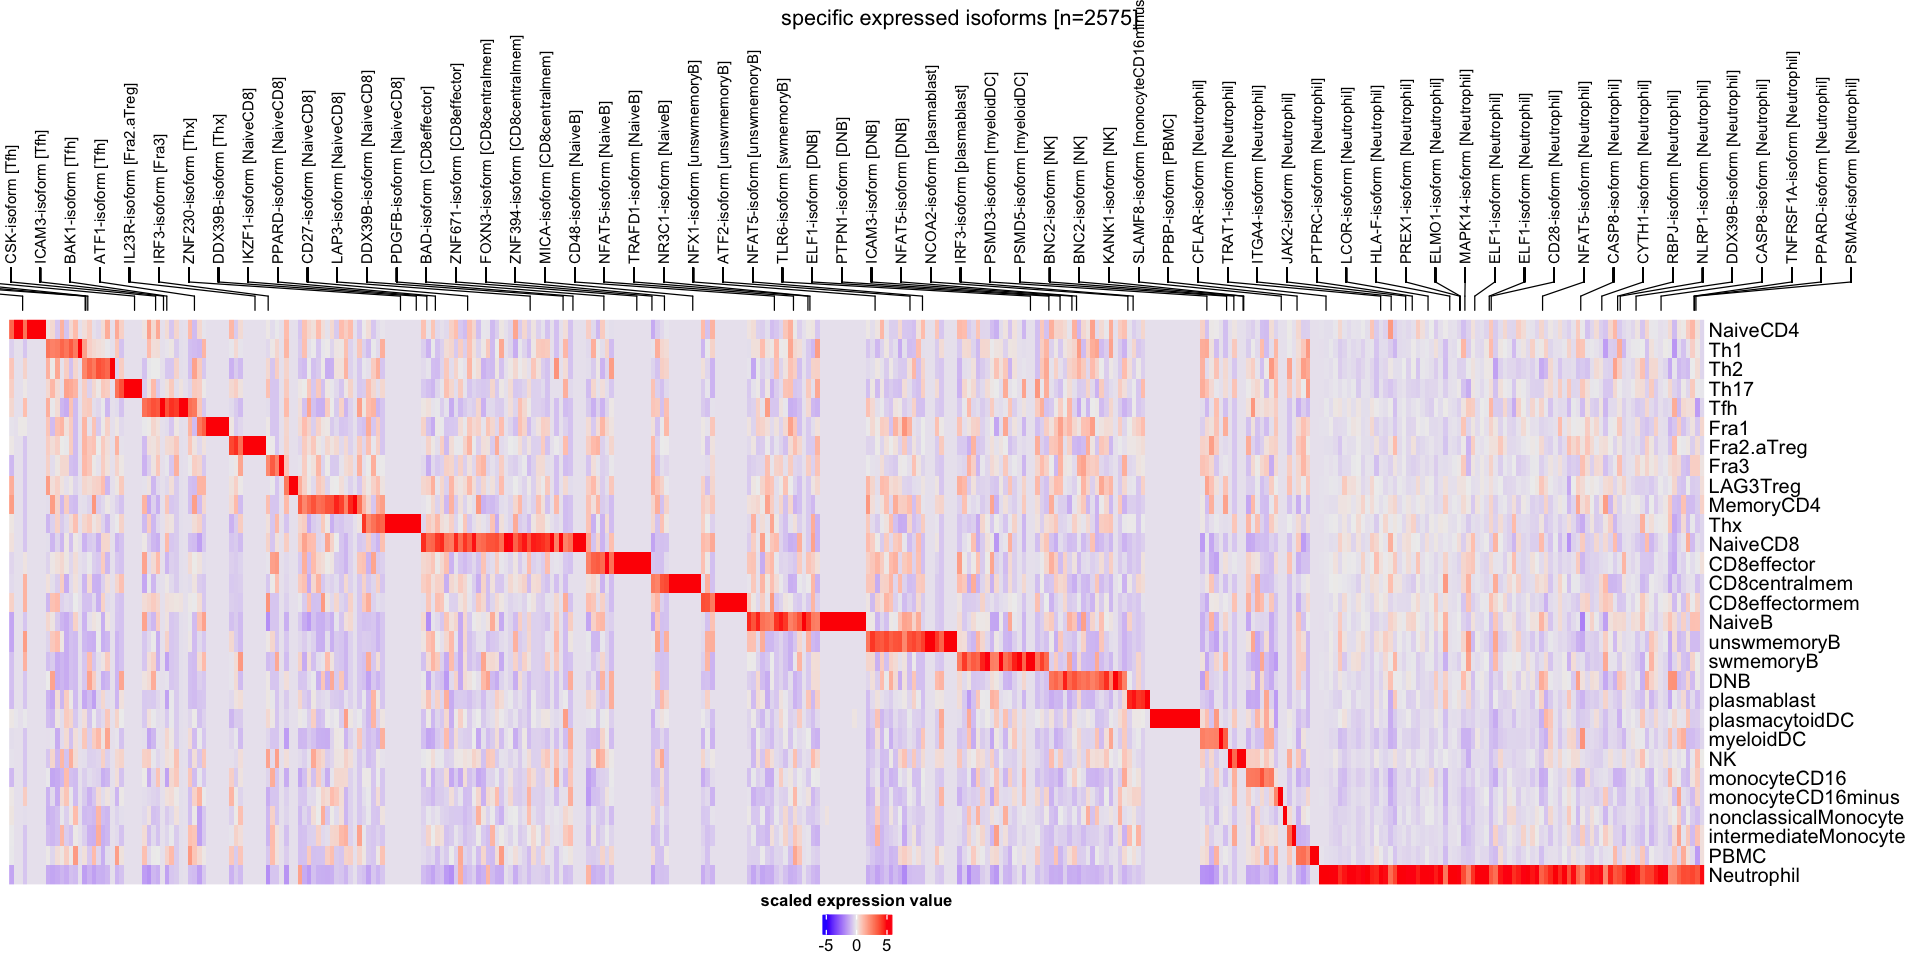

In [10]:
# specific isoforms

options(repr.plot.width=16, repr.plot.height=8)
# gwas_genes: efotraits_EFO_0000540-associations-2022-06-14.csv

ht_list = 
  HeatmapAnnotation(
    label = anno_mark(at = which(col_lab$immune_or_TF & col_lab$associated_gene %in% gwas_genes), 
                      labels = col_lab[col_lab$immune_or_TF & col_lab$associated_gene %in% gwas_genes, ]$id, 
                      side = "top",
                      labels_gp = gpar(fontsize = 9
                                       # col = rep(c("palegreen","palegreen3","palegreen4","chartreuse","chartreuse3","chartreuse4","green1","green3","olivedrab1","olivedrab2","olivedrab3",
                                       #             "steelblue1","steelblue2","steelblue3","steelblue4",
                                       #             "wheat1","wheat2","wheat3",
                                       #             "grey90",
                                       #             "brown1","brown2","brown3","brown4",
                                       #             "black",
                                       #             "darkmagenta"),each=3)
                      ), 
                      padding = 0,
                      link_width = unit(0.01, "mm"),
                      link_height = unit(10, "mm")
    )) %v%
  Heatmap(scale(t(mat)), 
          cluster_columns = FALSE, show_column_names = FALSE, show_column_dend = FALSE,
          cluster_rows = FALSE, 
          row_names_gp = gpar(fontsize = 12, axis = 45),
          heatmap_legend_param = list(
            # at = c(-2, 0, 2),
            # labels = c("low", "zero", "high"),
            title = "scaled expression value",
            legend_height = unit(4, "cm"),
            direction = "horizontal",
            title_position = "topcenter") 
  ) 
draw(column_title = paste0("specific expressed isoforms [n=",nrow(mat),"]"), ht_list, heatmap_legend_side="bottom")

The automatically generated colors map from the minus and plus 99^th of
the absolute values in the matrix. There are outliers in the matrix
whose patterns might be hidden by this color mapping. You can manually
set the color to `col` argument.

Use `suppressMessages()` to turn off this message.



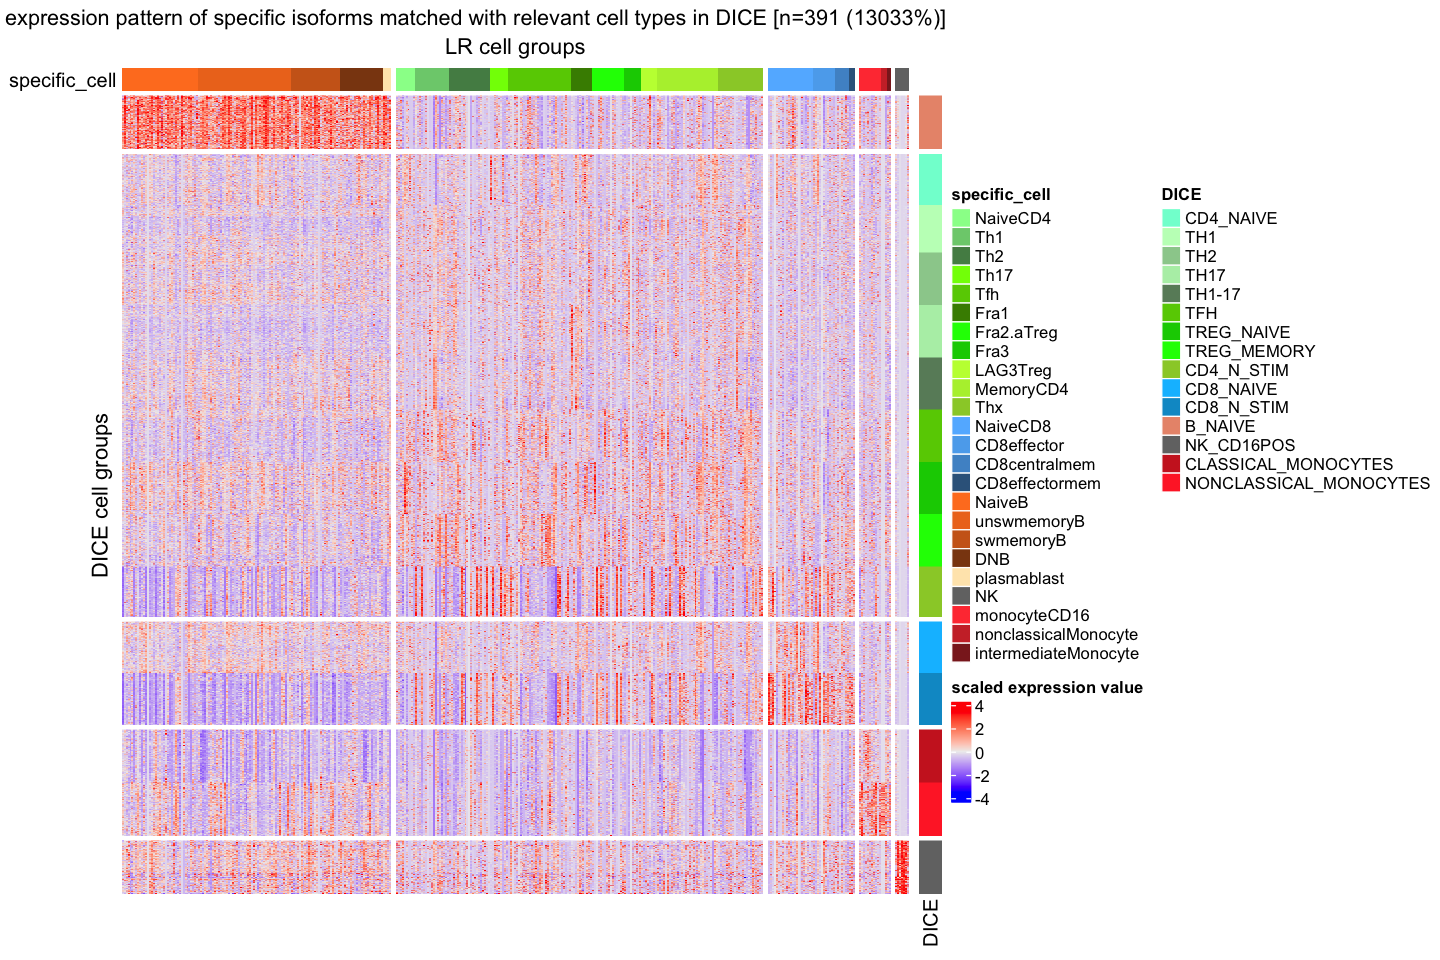

In [19]:
options(repr.plot.width=12, repr.plot.height=8)

cell_ord = c("NaiveCD4","Th1","Th2","Th17","Tfh","Fra1","Fra2.aTreg","Fra3","LAG3Treg","MemoryCD4","Thx",
             "NaiveCD8","CD8effector","CD8centralmem","CD8effectormem",
             "NaiveB","unswmemoryB","swmemoryB","DNB",
             "plasmablast","plasmacytoidDC","myeloidDC",
             "NK",
             "monocyteCD16","monocyteCD16minus","nonclassicalMonocyte","intermediateMonocyte",
             "PBMC",
             "Neutrophil")
ha = HeatmapAnnotation(specific_cell = factor(col_lab_dice$specific_cell_LR, levels = intersect(cell_ord,col_lab_dice$specific_cell_LR)),
                       col = list(specific_cell = c("NaiveB" = "chocolate1","unswmemoryB" = "chocolate2","swmemoryB" = "chocolate3","DNB" = "chocolate4",
                                                    "NaiveCD4" = "palegreen","Th1" = "palegreen3","Th2" = "palegreen4","Th17" = "chartreuse","Tfh" = "chartreuse3","Fra1" = "chartreuse4","Fra2.aTreg" = "green1","Fra3" = "green3","LAG3Treg" = "olivedrab1","MemoryCD4" = "olivedrab2","Thx" = "olivedrab3",
                                                    "NaiveCD8" = "steelblue1","CD8effector" = "steelblue2","CD8centralmem" = "steelblue3","CD8effectormem" = "steelblue4",
                                                    "plasmablast" = "wheat1","plasmacytoidDC" = "wheat2","myeloidDC" = "wheat3",
                                                    "NK" = "grey45",
                                                    "monocyteCD16" = "brown1","monocyteCD16minus" = "brown2","nonclassicalMonocyte" = "brown3","intermediateMonocyte" = "brown4",
                                                    "PBMC" = "black",
                                                    "Neutrophil" = "darkmagenta")),
                       annotation_name_side = "left")
ht_list = 
  Heatmap(scale(t(dice)), 
          top_annotation = ha, 
          cluster_columns = FALSE, show_column_names = FALSE, show_column_dend = FALSE,
          cluster_rows = FALSE, show_row_names = FALSE, show_row_dend = FALSE, 
          row_names_gp = gpar(fontsize = 10, axis = 45),
          row_split = 
            IID_d$cell %>%
            as.data.frame() %>%
            magrittr::set_colnames("cell") %>%
            dplyr::mutate(group = dplyr::case_when(
              cell == "B_NAIVE" ~ "B",
              cell == "CD4_NAIVE" ~ "CD4T",cell == "CD4_N_STIM" ~ "CD4T",cell == "TH1" ~ "CD4T",cell == "TH17" ~ "CD4T",cell == "TH2" ~ "CD4T",cell == "TH1-17" ~ "CD4T",cell == "TFH" ~ "CD4T",cell == "TREG_MEMORY" ~ "CD4T",cell == "TREG_NAIVE" ~ "CD4T",
              cell == "CD8_NAIVE" ~ "CD8T",cell == "CD8_N_STIM" ~ "CD8T",
              cell == "NONCLASSICAL_MONOCYTES" ~ "Mono",cell == "CLASSICAL_MONOCYTES" ~ "Mono",
              cell == "NK_CD16POS" ~ "NK"
            )) %>%
            .$group
          , 
          row_title = "DICE cell groups",
          column_split = col_lab_dice$specific_cell_LR %>%
            as.data.frame() %>%
            magrittr::set_colnames("cell") %>%
            dplyr::mutate(group = dplyr::case_when(
              cell == "NaiveB" ~ "B",cell == "unswmemoryB" ~ "B",cell == "swmemoryB" ~ "B",cell == "DNB" ~ "B",cell == "plasmablast" ~ "B",
              cell == "NaiveCD4" ~ "CD4T",cell == "Th1" ~ "CD4T",cell == "Th2" ~ "CD4T",cell == "Th17" ~ "CD4T",cell == "Tfh" ~ "CD4T",cell == "Fra1" ~ "CD4T",cell == "Fra2.aTreg" ~ "CD4T",cell == "Fra3" ~ "CD4T",cell == "LAG3Treg" ~ "CD4T",cell == "MemoryCD4" ~ "CD4T",cell == "Thx" ~ "CD4T",
              cell == "NaiveCD8" ~ "CD8T",cell == "CD8effector" ~ "CD8T",cell == "CD8centralmem" ~ "CD8T",cell == "CD8effectormem" ~ "CD8T",
              cell == "monocyteCD16" ~ "Mono",cell == "nonclassicalMonocyte" ~ "Mono",cell == "intermediateMonocyte" ~ "Mono",cell == "monocyteCD16minus" ~ "Mono",
              cell == "NK" ~ "NK"
            )) %>%
            .$group,
          column_title = "LR cell groups",
          heatmap_legend_param = list(
            # at = c(-2, 0, 2),
            # labels = c("low", "zero", "high"),
            title = "scaled expression value") 
  ) +
  Heatmap(IID_d$cell, 
          name = "DICE", 
          col = c("B_NAIVE" = "darksalmon",
                  "CD4_NAIVE" = "aquamarine1","CD4_N_STIM" = "olivedrab3","TH1" = "darkseagreen1","TH17" = "darkseagreen2","TH2" = "darkseagreen3","TH1-17" = "darkseagreen4","TFH" = "chartreuse3","TREG_MEMORY" = "green1","TREG_NAIVE" = "green3",
                  "CD8_NAIVE" = "deepskyblue","CD8_N_STIM" = "deepskyblue3",
                  "NONCLASSICAL_MONOCYTES" = "firebrick1","CLASSICAL_MONOCYTES" = "firebrick3",
                  "NK_CD16POS" = "grey45"),
          width = unit(5, "mm"))
draw(column_title = paste0("expression pattern of specific isoforms matched with relevant cell types in DICE [n=",nrow(dice)," (",format(100*nrow(dice)/nrow(mat),digits = 4),"%)]"), 
     ht_list, 
     merge_legends = TRUE,
     heatmap_legend_side="right")


# Are specifically expressed cell-types in isoform atlas matched with other datasets?
## permutation test using DICE
### The permutation test is performed by shuffling of specific_cell_LR label 1000 times to statistically test whether the above-mentioned number of matches is large or not (whether the specific expressed cell in LR matches the DICE cell types by chance or not). (i.e., whether the specific expressed cells in LR are consistent with the DICE cell types rather than coincidental).
### Result
#### Cell types of 15% (391/2575) of isoforms specifically expressed in LR-PB29 matched concordant cell types in DICE
#### According to the permutation test shuffled label of specifically expressed cell type (n=1000),                                    
#### specifically expressed cell types of LR-PB29 and top cell types of DICE* matched significantly (p=0.004).
##### * Pairs of cell-types
##### B
##### DICE: B_NAIVE 
##### LR-PB29: NaiveB, unswmemoryB, swmemoryB, DNB, plasmablast
##### CD4T
##### DICE: CD4_NAIVE, CD4_N_STIM, TH1, TH17, TH2, TH1-17, TFH, TREG_MEMORY, TREG_NAIVE
##### LR-PB29: NaiveCD4, Th1, Th2, Th17, Tfh,Fra1.Treg, Fra2.aTreg, Fra3.Treg, LAG3.Treg, MemoryCD4, Thx
##### CD8T
##### DICE: CD8_NAIVE, CD8_N_STIM
##### LR-PB29: NaiveCD8, CD8effector, CD8centralmem, CD8effectormem
##### Monocyte
##### DICE: CLASSICAL_MONOCYTES, NONCLASSICAL_MONOCYTES
##### LR-PB29: monocyteCD16, monocyteCD16minus, nonclassicalMonocyte, intermediateMonocyte
##### NK
##### DICE: NK_CD16POS
##### LR-PB29: NK


Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 23714 rows containing non-finite values (stat_compare_means).”


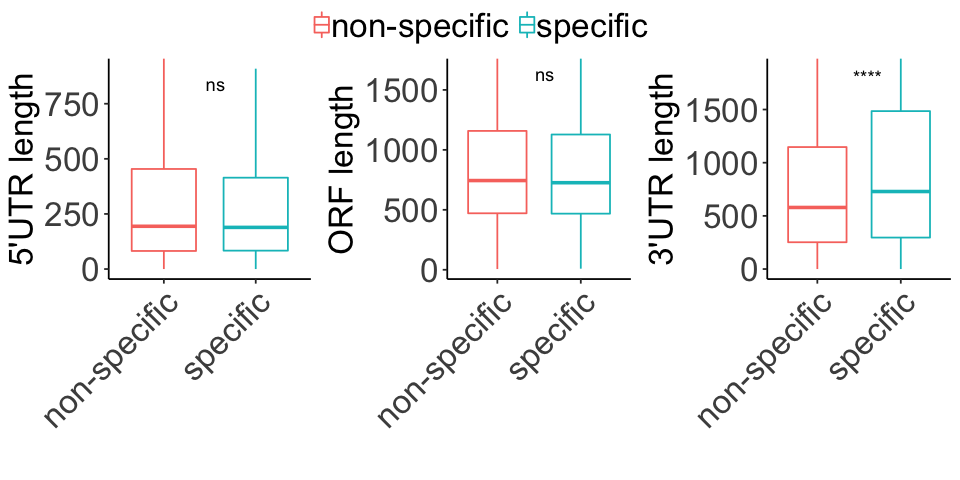

In [12]:
# compare length between specific isoforms and non-specific isoforms
options(repr.plot.width=8, repr.plot.height=4)
# compare length
variable = "specificity_LR"
for (region in c("five_utr_length","CDS_length","three_utr_length")){
  lab = dplyr::case_when(
    region == "five_utr_length" ~ "5'UTR length",
    region == "CDS_length" ~ "ORF length",
    region == "three_utr_length" ~ "3'UTR length"
  )
  g = out %>%
    dplyr::mutate(strata = eval(parse(text = variable)),
                  strata = dplyr::case_when(
                    strata ~ "specific",
                    !strata ~ "non-specific"
                  )) %>%
    ggboxplot(., x="strata", y=region,
              color = "strata",
              outlier.shape = NA) + 
    coord_cartesian(ylim = quantile(eval(parse(text=paste0("out$",region))), c(0, 0.9), na.rm=TRUE)) +
    stat_compare_means(
      label = "p.signif",
      label.y = quantile(eval(parse(text=paste0("out$",region))), 0.88, na.rm=TRUE),
      label.x.npc = "center") + 
    theme_classic() +
    ylab(lab) +
    xlab("") +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          legend.position = "bottom",
          plot.title = element_text(size=20),
          axis.title.x = element_text(size=20),
          axis.title.y = element_text(size =20),
          axis.text.y = element_text(size = 20),
          axis.text.x = element_text(size = 20,angle = 45, hjust=1),
          legend.text =  element_text(size = 20), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 0, hjust = 0))
  assign(paste0("g_",region),g)
}

ggpubr::ggarrange(g_five_utr_length,g_CDS_length,g_three_utr_length,ncol=3,common.legend = TRUE)




In [13]:
# enrichment of RBP binding motif by RBPmap
## specific isoforms and others (LR cell-types, SR cell-types, SR stimulus)
## translational efficiency top10 vs bottom10)

length(unique(pval_rbp$RBP)) # total number of tested RBP

# ELAVL1
pval_rbp %>%
  dplyr::filter(RBP=="HuR") %>%
  dplyr::arrange(-CI_up)

[1] 132

RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HuR,1.695455e-125,"bottom10: 63.15,others: 79.13,top10:108.55",0.5817116,1.7190656,1.6413194,1.8003825,te_rank,3UTR
HuR,6.982415e-32,"FALSE:47.18,TRUE:75.53",0.6246448,1.6009272,1.4778756,1.7337880,specificity_SR_stim,CDS
HuR,1.851909e-30,"FALSE: 78.90,TRUE:118.81",0.6640217,1.5059504,1.4028698,1.6168342,specificity_SR_stim,3UTR
HuR,4.028083e-09,"FALSE:18.50,TRUE:26.05",0.7099577,1.4085286,1.2533622,1.5798002,specificity_SR_stim,5UTR
HuR,5.010927e-04,"FALSE:18.54,TRUE:24.68",0.7515222,1.3306284,1.1285508,1.5625551,specificity_SR_celltype,5UTR
HuR,1.298603e-67,"FALSE: 78.25,TRUE:116.07",0.6741422,1.4833418,1.4181573,1.5515666,specificity_LRgroup,3UTR
HuR,3.153813e-22,"FALSE: 78.90,TRUE:106.52",0.7407246,1.3500147,1.2697644,1.4353584,specificity_LR,3UTR
HuR,2.002070e-22,"FALSE:1733.46,TRUE:2253.69",0.7691666,1.3001232,1.2330499,1.3716886,specificity_SR_stim,total
HuR,6.900757e-20,"FALSE:1588.89,TRUE:2033.29",0.7814381,1.2797080,1.2135625,1.3502687,specificity_SR_stim,Intron


In [14]:
# IGF2BP3
## Insulin-like growth factor 2 mRNA-binding protein 3 is a protein that in humans is encoded by the IGF2BP3 gene.
## The protein encoded by this gene is primarily found in the nucleolus, where it can bind to the 5' UTR of the insulin-like growth factor II leader 3 mRNA and may repress translation of insulin-like growth factor II during late development.
pval_rbp %>%
  dplyr::filter(RBP=="IGF2BP3") %>%
  dplyr::filter(strata=="te_rank") %>%
  dplyr::arrange(-CI_up)


RBP,chi_pval,proportion,fold,odds,CI_low,CI_up,strata,region
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
IGF2BP3,9.214612e-110,"bottom10:27.67,others:40.13,top10:54.05",0.5120040,1.9530737,1.8402179,2.0732535,te_rank,3UTR
IGF2BP3,7.033705e-16,"bottom10:37.48,others:44.63,top10:46.45",0.8069225,1.2392585,1.1705684,1.3120385,te_rank,CDS
IGF2BP3,3.440789e-72,"bottom10:629.76,others:789.80,top10:764.37",0.8238843,1.2137561,1.1744349,1.2544975,te_rank,total
IGF2BP3,1.165976e-77,"bottom10:549.32,others:695.44,top10:659.97",0.8323442,1.2014200,1.1621215,1.2420904,te_rank,Intron
IGF2BP3,1.126658e-109,"bottom10:15.28,others: 9.60,top10: 3.91",3.9110452,0.2556872,0.2243935,0.2907307,te_rank,5UTR


[1] "specificity_LR"
[1] "specificity_LRgroup"
[1] "specificity_SR_celltype"
[1] "specificity_SR_stim"
[1] "te_rank"


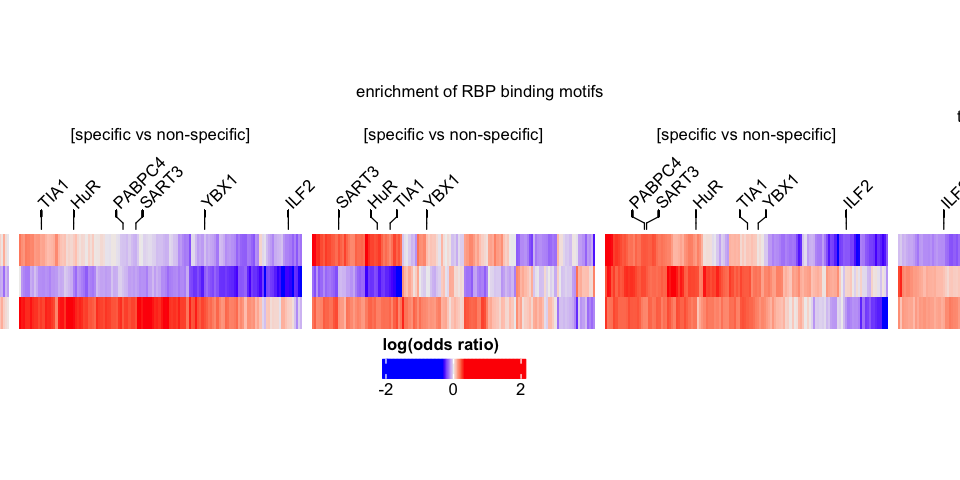

In [15]:
options(repr.plot.width=8, repr.plot.height=4)

variable="specificity_LR"
genes=c("HuR",InnateDB)
# variable="specificity_SR_celltype"
# variable="specificity_SR_stim"
# variable="InnateDB"
# variable="te_rank"
variables=c("specificity_LR","specificity_LRgroup","specificity_SR_celltype","specificity_SR_stim","te_rank")
for (variable in variables){
  print(variable)
  mat = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(log_odds = log(odds),
                  region = factor(region,levels=c("Intron","3UTR","CDS","5UTR","total"))
    ) %>%
    dplyr::select(c(log_odds,region,RBP)) %>%
    tidyr::pivot_wider(names_from = "RBP",
                       values_from = "log_odds") %>%
    as.data.frame() %>%
    tibble::column_to_rownames("region") %>%
    as.matrix()
  dim(mat)
  lab = dplyr::case_when(
    variable == "specificity_LR" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_LRgroup" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_celltype" ~ paste0("[specific vs non-specific]"),
    variable == "specificity_SR_stim" ~ paste0("[specific vs non-specific]"),
    variable == "te_rank" ~ paste0("translational efficiency\n[top10 vs bottom10]"))
  anno_label = pval_rbp %>%
    dplyr::filter(region != "total") %>%
    dplyr::filter(strata == variable) %>%
    dplyr::mutate(sig = ifelse(CI_up<1 | CI_low>1, TRUE, FALSE),
                  interest = ifelse(RBP %in% genes, TRUE, FALSE)) %>%
    dplyr::group_by(RBP) %>%
    dplyr::mutate(sig = ifelse(any(sig), TRUE, FALSE)) %>%
    as.data.frame() %>%
    dplyr::distinct(RBP,sig,interest) %>%
    magrittr::set_rownames(.$RBP) %>%
    .[colnames(mat),]
  show_heatmap_legend = ifelse(variable == "specificity_LR", TRUE, FALSE)
  mat = mat[c("5UTR","CDS","3UTR"),]
  ht_list = 
    Heatmap(mat, 
            top_annotation = HeatmapAnnotation(mark = anno_mark(at = which(anno_label$interest & anno_label$sig), 
                                                                labels = anno_label[anno_label$interest & anno_label$sig, ]$RBP, 
                                                                side = "top",
                                                                labels_rot = 45,
                                                                labels_gp = gpar(fontsize = 10), 
                                                                link_width = unit(5, "mm"), 
                                                                padding = unit(3, "mm")
            )),
            cluster_columns = TRUE, show_column_names = FALSE, show_column_dend = FALSE,
            cluster_rows = FALSE, show_row_names = TRUE, show_row_dend = FALSE, 
            row_names_gp = gpar(fontsize = 10, axis = 0),
            column_title = lab, 
            column_title_side = "top",
            column_title_gp = gpar(fontsize = 10, axis = 45),
            show_heatmap_legend = show_heatmap_legend,
            heatmap_legend_param = list(
              at = c(-2, 0, 2),
              # labels = c("low", "zero", "high"),
              title = "log(odds ratio)",
              legend_height = unit(4, "cm"),
              legend_width = unit(3, "cm"),
              legend_side = "bottom",
              direction = "horizontal") , 
            width = unit(6, "cm"),
            height = unit(2, "cm")
    )
  assign(paste0("ht_list_",variable),ht_list)
}

draw(column_title = "enrichment of RBP binding motifs", 
     column_title_gp = gpar(fontsize = 10, axis = 45),
     ht_list_specificity_LR + 
     ht_list_specificity_LRgroup + 
     ht_list_specificity_SR_celltype + 
     ht_list_specificity_SR_stim + 
     ht_list_te_rank , 
     merge_legends = TRUE,
     heatmap_legend_side="bottom")


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



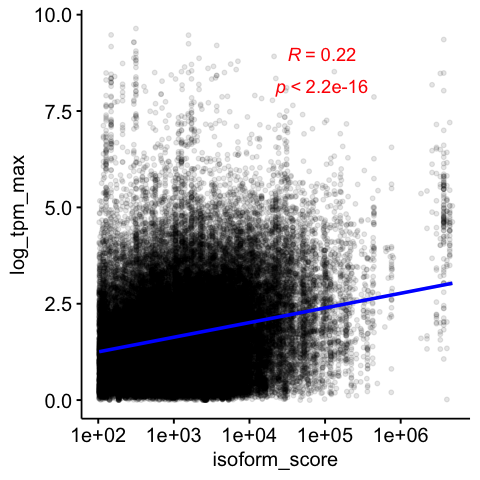

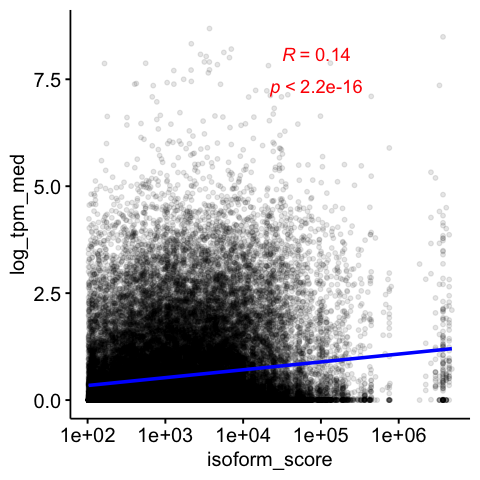

In [16]:
options(repr.plot.width=4, repr.plot.height=4)

## correlation with isoform expression
### max of GEUVADIS
elavl %>%
  dplyr::group_by(isoform) %>%
  dplyr::mutate(isoform_score = sum(pileup)) %>%
  dplyr::arrange(isoform) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,isoform_score,log_tpm_max) %>%
  ggscatter(., x = "isoform_score", y = "log_tpm_max",
            color = "black", size = 1, alpha = 0.1, 
            add = "reg.line",  
            add.params = list(color = "blue", fill = "lightgray"),
            conf.int = TRUE, 
            cor.coef = TRUE,
            cor.coeff.args = list(method = "pearson", label.x.npc = "center", label.y.npc = "top", label.sep = "\n", color="red")
  ) +
  scale_x_log10()

### median of GEUVADIS
elavl %>%
  dplyr::group_by(isoform) %>%
  dplyr::mutate(isoform_score = sum(pileup)) %>%
  dplyr::arrange(isoform) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,isoform_score,log_tpm_med) %>%
  ggscatter(., x = "isoform_score", y = "log_tpm_med",
            color = "black", size = 1, alpha = 0.1, 
            add = "reg.line",  
            add.params = list(color = "blue", fill = "lightgray"),
            conf.int = TRUE, 
            cor.coef = TRUE,
            cor.coeff.args = list(method = "pearson", label.x.npc = "center", label.y.npc = "top", label.sep = "\n", color="red")
  ) +
  scale_x_log10()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6118  3.3227  4.3295  4.4258  5.3825 11.9277 

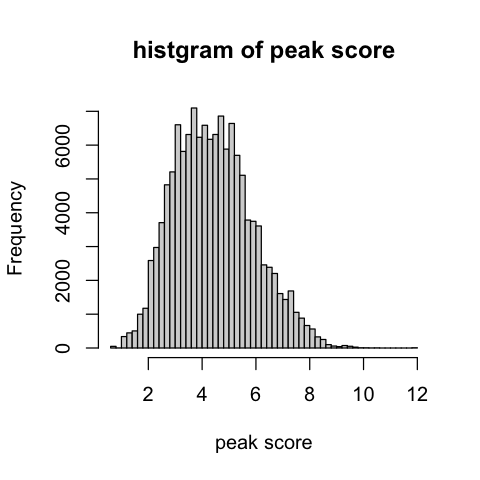

In [17]:
# summary of peak score
elavl %>%
  # dplyr::filter(log_tpm_med>0) %>%
  dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
  dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
  dplyr::group_by(isoform,region) %>%
  dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
  dplyr::arrange(isoform,region) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
  .$adj_count_sum %>%
  summary()

options(repr.plot.width=4, repr.plot.height=4)
elavl %>%
  # dplyr::filter(log_tpm_med>0) %>%
  dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
  dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
  dplyr::group_by(isoform,region) %>%
  dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
  dplyr::arrange(isoform,region) %>%
  as.data.frame() %>%
  dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
  .$adj_count_sum %>%
  hist(., breaks = 50, main = "histgram of peak score", xlab = "peak score")

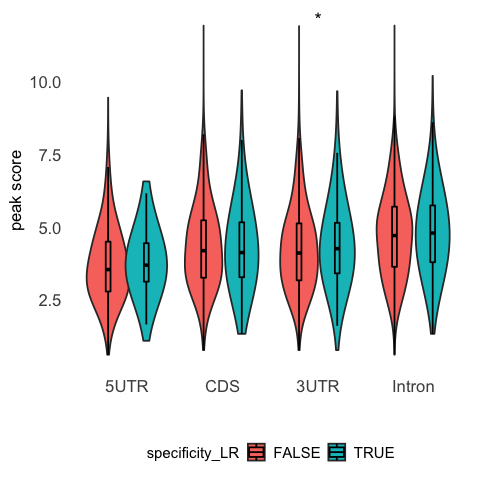

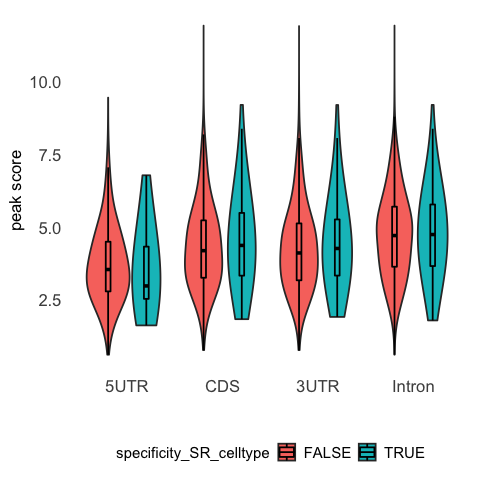

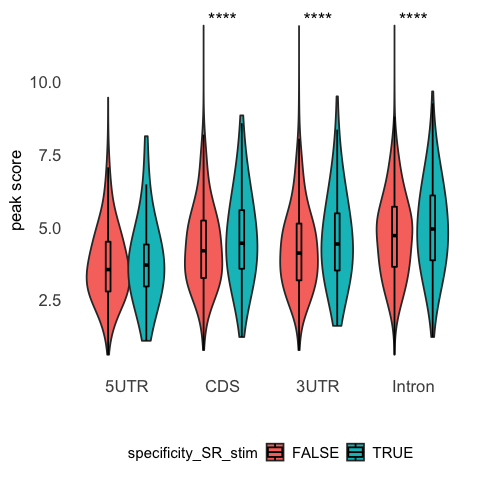

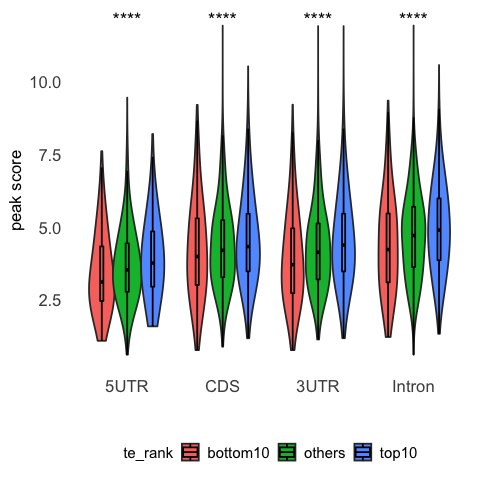

In [18]:
# compare peak scores according to specificity and translational efficiency
for (variable in c("specificity_LR","specificity_SR_celltype","specificity_SR_stim","te_rank")){
  num = grep(variable,c("specificity_LR","specificity_SR_celltype","specificity_SR_stim","te_rank"))+1
  g = elavl %>%
    # dplyr::filter(log_tpm_med>0) %>%
    dplyr::distinct(isoform,region,peak_id,.keep_all = TRUE) %>%
    dplyr::mutate(adj_count = pileup/(log_tpm_med_sum+1),
                  region = factor(region,levels=c("5UTR","CDS","3UTR","Intron"))) %>%
    dplyr::group_by(isoform,region) %>%
    dplyr::mutate(adj_count_sum = log(sum(adj_count)+1)) %>%
    dplyr::arrange(isoform,region) %>%
    as.data.frame() %>%
    dplyr::distinct(isoform,region,.keep_all = TRUE) %>%
    dplyr::filter(!is.na(eval(parse(text=variable)))) %>%
    ggplot(., aes(x=region, y=adj_count_sum, fill = eval(parse(text=variable)))) + 
    geom_violin(adjust=3, position = position_dodge(width = 0.8)) +
    geom_boxplot(width=0.1, color="black", na.rm = TRUE, outlier.shape = NA, position = position_dodge(width = 0.8)) +
    stat_compare_means(label = "p.signif",
                       label.x.npc = "center",
                       symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1), symbols = c("****", "***", "**", "*", ""))) +
    xlab("") +
    ylab("peak score") +
    labs(fill=variable) +
    theme_minimal() +
    theme(strip.text.x=element_text(size=9, color="black", face="bold"),
          strip.text.y=element_text(size=9, color="black", face="bold"),
          panel.grid=element_blank(),
          legend.position = "bottom",
          plot.title = element_text(size=10),
          axis.title.x = element_text(size=10),
          axis.title.y = element_text(size =10),
          axis.text.y = element_text(size = 10),
          axis.text.x = element_text(size = 10),
          legend.text =  element_text(size = 9), 
          legend.key.size = grid::unit(0.8, "lines"),
          legend.title = element_text(size = 9, hjust = 0))
  plot(g)
}
